In [25]:
import pandas as pd
import numpy as np

In [26]:
train_df = pd.read_csv("train_updated_04132022.csv")

In [27]:
train_df

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,...,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,04-01-2021,10-06-2019
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,...,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,04-01-2021,10/27/19
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,...,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,04-01-2021,10/31/19
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,...,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,04-01-2021,10-01-2019
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,...,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,04-01-2021,9/13/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,16284,4.97,5.81,5.01,29.44,-0.083333,-0.033333,7.13,5.41,5.60,...,2.782609,365.399130,354.915217,13.880435,23.077391,4162.913043,70.181818,36.957826,04-01-2021,09-05-2019
40496,49732,4.81,4.53,31.68,4.88,0.016667,-0.900000,4.71,3.99,49.68,...,1.066667,378.554667,374.952667,17.673333,28.495333,4181.600000,11.888889,46.168667,04-01-2021,9/18/19
40497,43158,4.73,4.77,5.71,4.67,-0.020000,1.706667,3.83,3.48,4.51,...,2.227273,345.429091,342.216818,17.871818,29.766364,4157.045455,26.400000,47.638182,04-01-2021,10/18/19
40498,5860,4.93,5.01,4.85,20.92,-0.103333,0.526667,3.35,4.30,4.12,...,6.750000,364.964000,362.155500,14.557000,22.894000,4171.650000,17.714286,37.451000,04-01-2021,10-02-2019


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [29]:
# The NAN values of these columns will be handled via Mean/Median/Mode Imputation
'''
avg_time_charging_lag7, 
charging_rate_lag7, 
avg_time_discharging_lag7,
discharging_rate_lag7,
avg_time_charging_lag5,
avg_time_discharging_lag5
avg_time_charging_lag6,
avg_time_charging_lag8
avg_time_discharging_lag8       
avg_time_charging_lag9          
avg_time_discharging_lag9       
avg_time_charging_lag10         
avg_time_discharging_lag10      
avg_time_charging_lag11        
avg_time_discharging_lag11 
'''

'\navg_time_charging_lag7, \ncharging_rate_lag7, \navg_time_discharging_lag7,\ndischarging_rate_lag7,\navg_time_charging_lag5,\navg_time_discharging_lag5\navg_time_charging_lag6,\navg_time_charging_lag8\navg_time_discharging_lag8       \navg_time_charging_lag9          \navg_time_discharging_lag9       \navg_time_charging_lag10         \navg_time_discharging_lag10      \navg_time_charging_lag11        \navg_time_discharging_lag11 \n'

In [30]:
lists_via_MMM_imputation = ["avg_time_charging_lag7", 
"charging_rate_lag7", 
"avg_time_discharging_lag7",
"discharging_rate_lag7",
"avg_time_charging_lag5",
"avg_time_discharging_lag5",
"avg_time_charging_lag6",
"avg_time_charging_lag8",
"avg_time_discharging_lag8",       
"avg_time_charging_lag9",          
"avg_time_discharging_lag9",       
"avg_time_charging_lag10",         
"avg_time_discharging_lag10",      
"avg_time_charging_lag11",        
"avg_time_discharging_lag11",
"avg_time_discharging_lag6",
"discharging_rate_lag6",
"discharging_rate_lag8"]

In [31]:
train_df.isna().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

In [32]:
train_df.shape

(40500, 55)

#### Performing Mean, Median, Mode Imputation

In [33]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [34]:
train_df[['deviceid','Date Deployed']]

,deviceid,Date Deployed
0,28647,10-06-2019
1,36175,10/27/19
2,16107,10/31/19
3,27362,10-01-2019
4,19463,9/13/19
...,...,...
40495,16284,09-05-2019
40496,49732,9/18/19
40497,43158,10/18/19
40498,5860,10-02-2019


In [35]:
df_train2 = train_df.copy()

In [36]:
df_train2

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,...,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,04-01-2021,10-06-2019
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,...,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,04-01-2021,10/27/19
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,...,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,04-01-2021,10/31/19
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,...,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,04-01-2021,10-01-2019
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,...,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,04-01-2021,9/13/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,16284,4.97,5.81,5.01,29.44,-0.083333,-0.033333,7.13,5.41,5.60,...,2.782609,365.399130,354.915217,13.880435,23.077391,4162.913043,70.181818,36.957826,04-01-2021,09-05-2019
40496,49732,4.81,4.53,31.68,4.88,0.016667,-0.900000,4.71,3.99,49.68,...,1.066667,378.554667,374.952667,17.673333,28.495333,4181.600000,11.888889,46.168667,04-01-2021,9/18/19
40497,43158,4.73,4.77,5.71,4.67,-0.020000,1.706667,3.83,3.48,4.51,...,2.227273,345.429091,342.216818,17.871818,29.766364,4157.045455,26.400000,47.638182,04-01-2021,10/18/19
40498,5860,4.93,5.01,4.85,20.92,-0.103333,0.526667,3.35,4.30,4.12,...,6.750000,364.964000,362.155500,14.557000,22.894000,4171.650000,17.714286,37.451000,04-01-2021,10-02-2019


In [37]:
def impute_nan(df1,df2,variable):
    median = df1[variable].median()
    df2[variable+"_median"]=df2[variable].fillna(median)

In [38]:
train_df['avg_time_charging_lag5'].median()

5.78

In [39]:
for i in lists_via_MMM_imputation:
    impute_nan(train_df,df_train2,i)

In [40]:
df_train2.isna().sum()

deviceid                              0
avg_time_charging_lag1                0
avg_time_charging_lag2                0
avg_time_charging_lag3                0
avg_time_charging_lag7               66
                                     ..
avg_time_charging_lag11_median        0
avg_time_discharging_lag11_median     0
avg_time_discharging_lag6_median      0
discharging_rate_lag6_median          0
discharging_rate_lag8_median          0
Length: 73, dtype: int64

In [41]:
df_train2 = df_train2.drop(columns = ["avg_time_charging_lag7", 
"charging_rate_lag7", 
"avg_time_discharging_lag7",
"discharging_rate_lag7",
"avg_time_charging_lag5",
"avg_time_discharging_lag5",
"avg_time_charging_lag6",
"avg_time_charging_lag8",
"avg_time_discharging_lag8",       
"avg_time_charging_lag9",          
"avg_time_discharging_lag9",       
"avg_time_charging_lag10",         
"avg_time_discharging_lag10",      
"avg_time_charging_lag11",        
"avg_time_discharging_lag11","avg_time_discharging_lag6",
"discharging_rate_lag6",
"discharging_rate_lag8",
"charging_rate_lag6"])

In [42]:
df_train2.isna().sum()

deviceid                                0
avg_time_charging_lag1                  0
avg_time_charging_lag2                  0
avg_time_charging_lag3                  0
charging_rate_lag3                      0
avg_time_discharging_lag1               0
avg_time_discharging_lag2               0
avg_time_discharging_lag3               0
discharging_rate_lag3                   0
fail_7                                  0
charge_cycle_time_below_12              0
avg_time_charging_lag4                  0
avg_time_discharging_lag4               0
avg_time_charging_lag12              2757
avg_time_discharging_lag12           2757
avg_time_charging_lag13              4382
avg_time_discharging_lag13           4382
avg_time_charging_lag14              6668
avg_time_discharging_lag14           6668
discharging_rate_lag4                   0
discharging_rate_lag5                   0
charging_rate_lag4                      0
charging_rate_lag5                      0
chargecycles                      

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

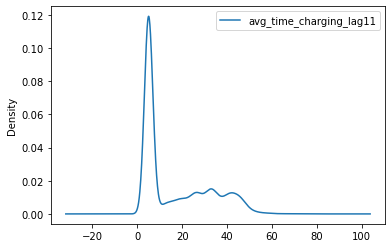

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
train_df['avg_time_charging_lag11'].plot(kind='kde', ax=ax)
#df_train2.avg_time_charging_lag5_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

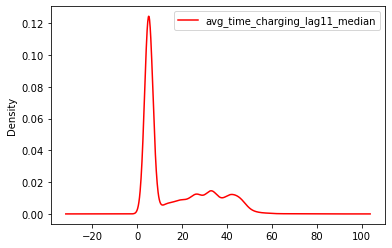

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
#train_df['avg_time_charging_lag5'].plot(kind='kde', ax=ax)
df_train2.avg_time_charging_lag11_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [46]:
#avg_time_charging_lag11

In [49]:
import seaborn as sns

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_time_charging_lag11'>

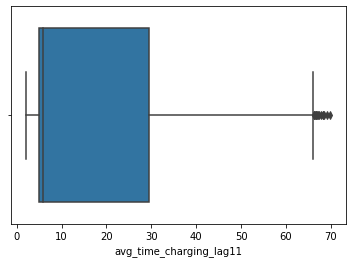

In [50]:
sns.boxplot('avg_time_charging_lag11',data=train_df)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_time_charging_lag11_median'>

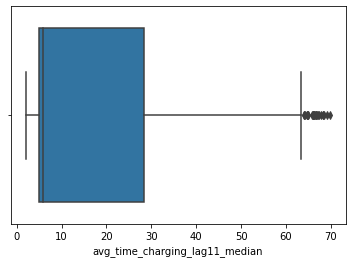

In [51]:
sns.boxplot('avg_time_charging_lag11_median',data=df_train2)

#### Imputation via Random Sample Method for missing values  > 2025( in number)

In [52]:
impute_nan_via_Random_Sample =  ["avg_time_charging_lag12",
'avg_time_discharging_lag12',           
"avg_time_charging_lag13",           
"avg_time_discharging_lag13",          
"avg_time_charging_lag14",         
"avg_time_discharging_lag14"]

In [53]:
def impute_nan_2(df,variable):
    #df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [54]:
for i in impute_nan_via_Random_Sample:
    impute_nan_2(df_train2,i)

In [55]:
df_train2.isna().sum()

deviceid                                0
avg_time_charging_lag1                  0
avg_time_charging_lag2                  0
avg_time_charging_lag3                  0
charging_rate_lag3                      0
avg_time_discharging_lag1               0
avg_time_discharging_lag2               0
avg_time_discharging_lag3               0
discharging_rate_lag3                   0
fail_7                                  0
charge_cycle_time_below_12              0
avg_time_charging_lag4                  0
avg_time_discharging_lag4               0
avg_time_charging_lag12              2757
avg_time_discharging_lag12           2757
avg_time_charging_lag13              4382
avg_time_discharging_lag13           4382
avg_time_charging_lag14              6668
avg_time_discharging_lag14           6668
discharging_rate_lag4                   0
discharging_rate_lag5                   0
charging_rate_lag4                      0
charging_rate_lag5                      0
chargecycles                      

In [56]:
#pd.set_option('display.max_rows', None)

In [57]:
df_train2 = df_train2.drop(columns = ["avg_time_charging_lag12",
'avg_time_discharging_lag12',           
"avg_time_charging_lag13",           
"avg_time_discharging_lag13",          
"avg_time_charging_lag14",         
"avg_time_discharging_lag14"])

In [58]:
df_train2.isna().sum()

deviceid                             0
avg_time_charging_lag1               0
avg_time_charging_lag2               0
avg_time_charging_lag3               0
charging_rate_lag3                   0
avg_time_discharging_lag1            0
avg_time_discharging_lag2            0
avg_time_discharging_lag3            0
discharging_rate_lag3                0
fail_7                               0
charge_cycle_time_below_12           0
avg_time_charging_lag4               0
avg_time_discharging_lag4            0
discharging_rate_lag4                0
discharging_rate_lag5                0
charging_rate_lag4                   0
charging_rate_lag5                   0
chargecycles                         0
dischargecycles                      0
total_off_time                       0
number_times_restart                 0
avg_volt_change_charging             0
avg_volt_change_discharging          0
avg_time_charging                    0
avg_time_discharging                 0
max_voltage_day          

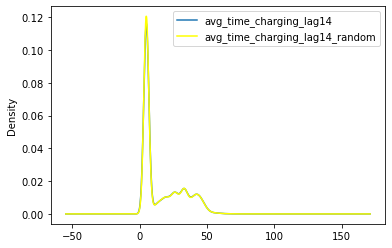

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
train_df['avg_time_charging_lag14'].plot(kind='kde', ax=ax)
df_train2.avg_time_charging_lag14_random.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

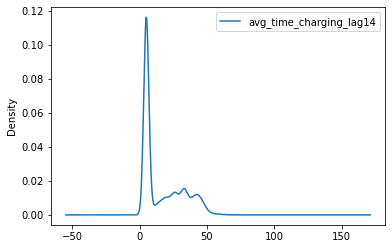

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
train_df['avg_time_charging_lag14'].plot(kind='kde', ax=ax)
#df_train2.avg_time_charging_lag14_random.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_time_charging_lag14'>

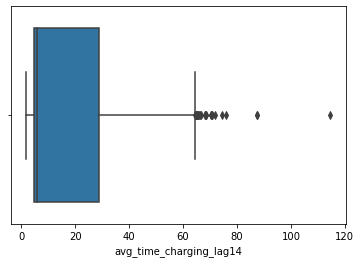

In [61]:
sns.boxplot('avg_time_charging_lag14',data=train_df)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_time_charging_lag14_random'>

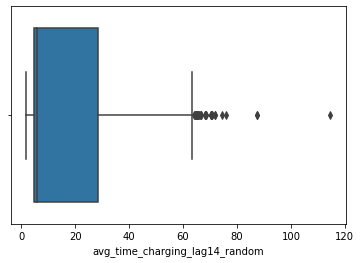

In [62]:
sns.boxplot('avg_time_charging_lag14_random',data=df_train2)

In [63]:
df_train2

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,fail_7,...,avg_time_discharging_lag11_median,avg_time_discharging_lag6_median,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random
0,28647,5.12,41.11,6.56,0.086667,4.37,91.70,15.70,-1.163333,0,...,6.07,79.33,0.816667,-0.173333,5.01,4.70,4.93,3.10,5.03,4.91
1,36175,36.60,5.16,6.23,0.136667,62.67,6.53,6.16,-0.066667,0,...,49.02,24.33,-3.063333,-0.103333,10.89,18.93,21.39,35.90,5.23,7.31
2,16107,5.51,5.04,4.52,-0.460000,5.13,5.65,4.14,-2.643333,0,...,6.23,5.73,0.000000,0.216667,5.13,4.37,4.73,3.50,26.79,41.29
3,27362,4.66,39.85,35.76,0.076667,3.93,76.37,60.86,-0.166667,0,...,4.15,52.99,-0.293333,-0.046667,4.71,3.82,13.27,18.62,4.97,4.16
4,19463,5.10,43.24,4.63,0.040000,4.69,71.44,3.80,0.066667,0,...,4.64,76.42,-0.006667,-1.790000,5.28,5.16,25.10,47.76,21.62,37.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,16284,4.97,5.81,5.01,-0.083333,7.13,5.41,5.60,-0.160000,1,...,5.91,20.12,-0.026667,0.060000,33.39,74.08,34.80,53.14,4.58,4.01
40496,49732,4.81,4.53,31.68,0.016667,4.71,3.99,49.68,0.533333,1,...,5.20,39.07,-0.540000,0.450000,27.65,42.56,26.34,36.82,33.77,65.97
40497,43158,4.73,4.77,5.71,-0.020000,3.83,3.48,4.51,0.006667,1,...,5.61,72.40,-0.006667,-3.506667,4.39,4.15,4.49,4.18,23.74,37.50
40498,5860,4.93,5.01,4.85,-0.103333,3.35,4.30,4.12,0.036667,0,...,3.49,4.13,0.203333,0.040000,5.19,5.06,18.13,28.20,48.68,89.30


In [64]:
df_train2.isna().sum()

deviceid                             0
avg_time_charging_lag1               0
avg_time_charging_lag2               0
avg_time_charging_lag3               0
charging_rate_lag3                   0
avg_time_discharging_lag1            0
avg_time_discharging_lag2            0
avg_time_discharging_lag3            0
discharging_rate_lag3                0
fail_7                               0
charge_cycle_time_below_12           0
avg_time_charging_lag4               0
avg_time_discharging_lag4            0
discharging_rate_lag4                0
discharging_rate_lag5                0
charging_rate_lag4                   0
charging_rate_lag5                   0
chargecycles                         0
dischargecycles                      0
total_off_time                       0
number_times_restart                 0
avg_volt_change_charging             0
avg_volt_change_discharging          0
avg_time_charging                    0
avg_time_discharging                 0
max_voltage_day          

In [65]:
df_train2.to_csv('cleaned_dataset_version2.csv')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_times_restart'>

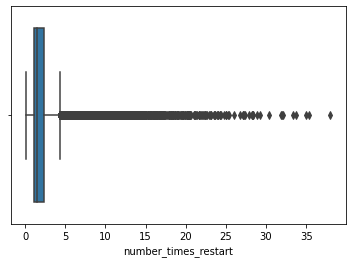

In [66]:
sns.boxplot('number_times_restart',data=df_train2)

In [67]:
filt_0 = (df_train2["fail_7"] == 0)
filt_1 = (df_train2["fail_7"] == 1)

In [68]:
df_train2[filt_0]['number_times_restart'].median()

1.444444444

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_times_restart'>

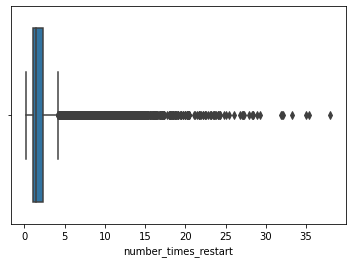

In [69]:
sns.boxplot('number_times_restart',data=df_train2[filt_0])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_times_restart'>

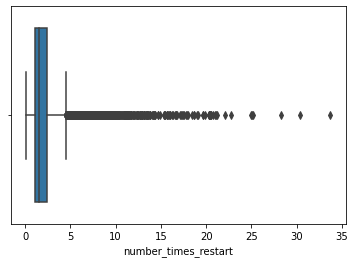

In [70]:
sns.boxplot('number_times_restart',data=df_train2[filt_1])

In [71]:
df_train2[filt_0][['piececount','fail_7']]

,piececount,fail_7
0,14.200000,0
1,19.777778,0
2,19.200000,0
3,23.625000,0
4,12.666667,0
...,...,...
40490,21.400000,0
40491,32.000000,0
40492,12.000000,0
40494,7.222222,0


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='piececount'>

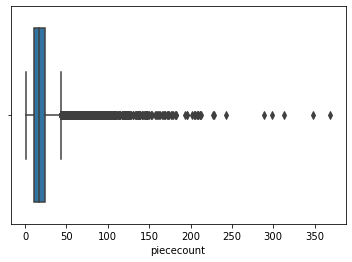

In [72]:
sns.boxplot('piececount',data=df_train2[filt_0])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='piececount'>

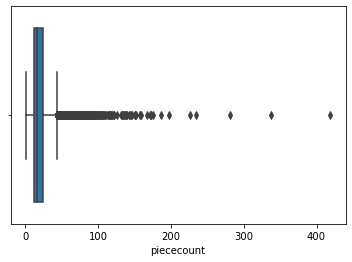

In [73]:
sns.boxplot('piececount',data=df_train2[filt_1])

In [74]:
df_train2[filt_1]['piececount'].describe()

count    9401.000000
mean       20.755059
std        17.147733
min         1.000000
25%        11.500000
50%        16.714286
75%        24.272727
max       418.916667
Name: piececount, dtype: float64

In [75]:
df_train2[filt_0]['piececount'].describe()

count    31099.000000
mean        20.456958
std         16.248646
min          1.000000
25%         11.272727
50%         16.454545
75%         24.300000
max        369.000000
Name: piececount, dtype: float64